In [31]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm



In [32]:
from sklearn.datasets import load_iris

In [134]:
iris=load_iris()
x=iris.data
y=iris.target
#print(iris.DESCR)

In [34]:
iris_data=DataFrame(x,columns=iris.feature_names)
iris_target=DataFrame(y,columns=['Species'])

In [35]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [37]:
def flower(n):
    if n==0:
        return'Setosa'
    elif n==1:
        return'Versicolour'
    elif n==2:
        return'Virginica'

In [38]:
iris_target['Species']=iris_target['Species'].apply(flower)

In [135]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [89]:
df=pd.concat([iris_data,iris_target],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,6.1,3.0,4.6,1.4,Setosa
1,7.7,3.0,6.1,2.3,Setosa
2,5.6,2.5,3.9,1.1,Setosa
3,6.4,2.8,5.6,2.1,Setosa
4,5.8,2.8,5.1,2.4,Setosa


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [93]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
#test_predict=log_model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
from sklearn.metrics import accuracy_score

In [137]:
ypred=logreg.predict(x_test)
print(accuracy_score(y_test,ypred))

0.8333333333333334


In [96]:
iris_data=DataFrame(x_train,columns=iris.feature_names)

In [97]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.1,3.0,4.6,1.4
1,7.7,3.0,6.1,2.3
2,5.6,2.5,3.9,1.1
3,6.4,2.8,5.6,2.1
4,5.8,2.8,5.1,2.4


In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
Knn=KNeighborsClassifier(n_neighbors=8)#no of neighbor=data in train
Knn.fit(x_train,y_train)
y_pred=Knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [100]:
Knn=KNeighborsClassifier(n_neighbors=40)#no of neighbor=data in train
Knn.fit(x_train,y_train)
y_pred=Knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [102]:
k_range=range(1,15)
accuracy=[]
for k in k_range:
    Knn=KNeighborsClassifier(n_neighbors=k)
    Knn.fit(x_train,y_train)
    y_pred=Knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'k value for Knn')

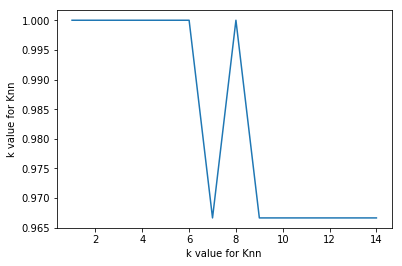

In [103]:
plt.plot(k_range,accuracy)
plt.xlabel('k value for Knn')
plt.ylabel('k value for Knn')

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
clf=RandomForestClassifier(n_estimators=150)

In [116]:
clf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
clf.score(x_test,y_test)#accuracy score --every algo have its own score

0.9666666666666667

In [124]:
from sklearn.svm import SVC
model=SVC()

In [125]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [127]:
model.score(x_test,y_test)

0.9666666666666667

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [132]:

clf2=DecisionTreeClassifier()
clf2=clf2.fit(x_train,y_train)

In [133]:
clf2.score(x_test,y_test)

0.9666666666666667